In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cleaned_dataset = pd.read_csv("World_Marriage_Cleaned_Dataset.csv")

In [4]:
print(cleaned_dataset)

            Country Age Group    Sex Marital Status Data Process  Start Year  \
0       Afghanistan   [15-19]    Man       Divorced       Survey        1972   
1       Afghanistan   [20-24]    Man       Divorced       Survey        1972   
2       Afghanistan   [25-29]    Man       Divorced       Survey        1972   
3       Afghanistan   [30-34]    Man       Divorced       Survey        1972   
4       Afghanistan   [35-39]    Man       Divorced       Survey        1972   
...             ...       ...    ...            ...          ...         ...   
228211     Zimbabwe   [55-59]  Woman        Widowed       Survey        2017   
228212     Zimbabwe   [60-64]  Woman        Widowed       Survey        2017   
228213     Zimbabwe   [65-69]  Woman        Widowed       Survey        2017   
228214     Zimbabwe   [70-74]  Woman        Widowed       Survey        2017   
228215     Zimbabwe     [75+]  Woman        Widowed       Survey        2017   

        End Year          Data Source  

In [5]:
#App 1: Identifying country groups based on marriage patterns
# Select columns that may be relevant for clustering
New_Data = cleaned_dataset[['Country', 'Marital Status']]

In [6]:
New_Data

Country Marital Status
0       Afghanistan       Divorced
1       Afghanistan       Divorced
2       Afghanistan       Divorced
3       Afghanistan       Divorced
4       Afghanistan       Divorced
...             ...            ...
228211     Zimbabwe        Widowed
228212     Zimbabwe        Widowed
228213     Zimbabwe        Widowed
228214     Zimbabwe        Widowed
228215     Zimbabwe        Widowed

[228216 rows x 2 columns]

In [22]:
# Example assuming each row represents an individual
cleaned_dataset['Count'] = 1

# Pivot the data
marital_counts = cleaned_dataset.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Rename the columns for clarity
marital_counts.columns = ['Country', 'Divorced', 'Married', 'Single', 'Widowed','Separated']

In [23]:
marital_counts

Country  Divorced  Married  Single  Widowed  Separated
0          Afghanistan       100      116      14       71        116
1              Albania       141      185      61       91        191
2              Algeria       129      162      57      129        160
3       American Samoa        84       86      58       90         86
4               Angola       101       95      87       48        121
..                 ...       ...      ...     ...      ...        ...
229  Wallis and Futuna        77      152       0      156        143
230     Western Sahara        28        0      28       28         28
231              Yemen       204      205       0      102        205
232             Zambia       252      252     101       86        272
233           Zimbabwe       219      353      66      191        377

[234 rows x 6 columns]

In [24]:
# Calculate the total population for each country
marital_counts['Total'] = marital_counts[['Divorced', 'Married', 'Single', 'Widowed','Separated']].sum(axis=1)

In [25]:
marital_counts

Country  Divorced  Married  Single  Widowed  Separated  Total
0          Afghanistan       100      116      14       71        116    417
1              Albania       141      185      61       91        191    669
2              Algeria       129      162      57      129        160    637
3       American Samoa        84       86      58       90         86    404
4               Angola       101       95      87       48        121    452
..                 ...       ...      ...     ...      ...        ...    ...
229  Wallis and Futuna        77      152       0      156        143    528
230     Western Sahara        28        0      28       28         28    112
231              Yemen       204      205       0      102        205    716
232             Zambia       252      252     101       86        272    963
233           Zimbabwe       219      353      66      191        377   1206

[234 rows x 7 columns]

In [26]:
# Example: Aggregate the data by country without using percentage fields
marriage_patterns = marital_counts.groupby('Country').agg({
    'Married': 'sum', 
    'Single': 'sum',
    'Divorced': 'sum',
    'Widowed': 'sum',
    'Separated': 'sum',
    'Total': 'sum'
}).reset_index()

In [14]:
marital_counts

Country  Divorced  Married  Single  Widowed  Separated  Total
0          Afghanistan       100      116      14       71        116    417
1              Albania       141      185      61       91        191    669
2              Algeria       129      162      57      129        160    637
3       American Samoa        84       86      58       90         86    404
4               Angola       101       95      87       48        121    452
..                 ...       ...      ...     ...      ...        ...    ...
229  Wallis and Futuna        77      152       0      156        143    528
230     Western Sahara        28        0      28       28         28    112
231              Yemen       204      205       0      102        205    716
232             Zambia       252      252     101       86        272    963
233           Zimbabwe       219      353      66      191        377   1206

[234 rows x 7 columns]

In [27]:
X = marital_counts

In [28]:
X

Country  Divorced  Married  Single  Widowed  Separated  Total
0          Afghanistan       100      116      14       71        116    417
1              Albania       141      185      61       91        191    669
2              Algeria       129      162      57      129        160    637
3       American Samoa        84       86      58       90         86    404
4               Angola       101       95      87       48        121    452
..                 ...       ...      ...     ...      ...        ...    ...
229  Wallis and Futuna        77      152       0      156        143    528
230     Western Sahara        28        0      28       28         28    112
231              Yemen       204      205       0      102        205    716
232             Zambia       252      252     101       86        272    963
233           Zimbabwe       219      353      66      191        377   1206

[234 rows x 7 columns]

In [29]:
# Drop non-numeric columns (like 'Country')
App1 = X.drop(columns=['Country'])

In [30]:
# Check for any non-numeric columns that need encoding
print(App1.dtypes)

# If there are categorical columns, apply encoding before scaling (optional)
# Example: Suppose there's a column 'Marital_Status', encode it like this:
# X['Marital_Status'] = X['Marital_Status'].astype('category').cat.codes

# Apply StandardScaler to the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(App1)

# Perform K-Means clustering
optimal_k = 10  # Choose based on the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Print and visualize the results
print(X[['Country', 'Cluster']].head())

Divorced     int64
Married      int64
Single       int64
Widowed      int64
Separated    int64
Total        int64
dtype: object


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


          Country  Cluster
0     Afghanistan        0
1         Albania        6
2         Algeria        6
3  American Samoa        0
4          Angola        0


In [31]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=X['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Countries by Marriage Patterns')
plt.show()

# Print the clustering results
print(X[['Country', 'Cluster']].head())

          Country  Cluster
0     Afghanistan        0
1         Albania        6
2         Algeria        6
3  American Samoa        0
4          Angola        0


TypeError: ufunc 'arctan2' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

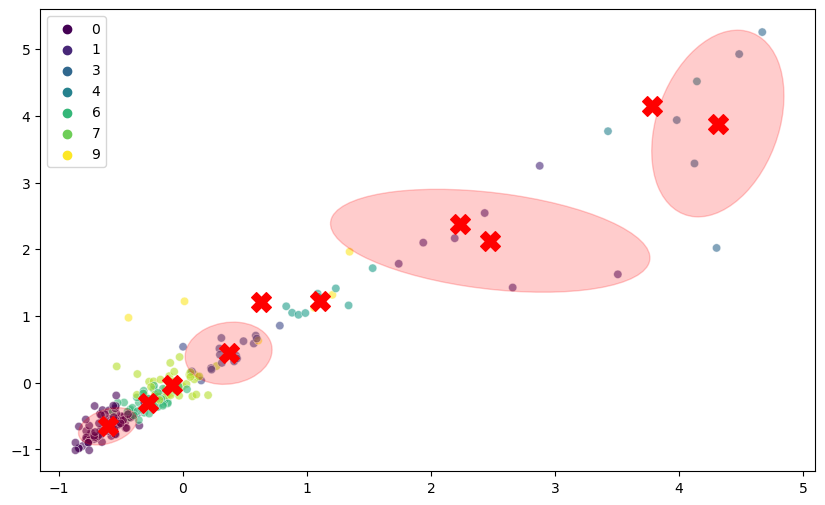

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse

# Assuming 'X_scaled' contains the scaled data and 'kmeans' is your KMeans object
centroids = kmeans.cluster_centers_
labels = X['Cluster'].values

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')

# Add ellipses for each cluster
for i in range(centroids.shape[0]):
    cluster_data = X_scaled[labels == i]
    if cluster_data.size > 0:
        # Calculate the mean and covariance
        mean = cluster_data.mean(axis=0)
        cov = np.cov(cluster_data, rowvar=False)
        
        # Calculate the ellipse parameters
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # Ensure the eigenvalues are sorted in descending order
        order = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[order]
        eigenvectors = eigenvectors[:, order]
        
        # Create the ellipse
        angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
        ellipse = Ellipse(xy=mean, width=2 * np.sqrt(eigenvalues[0]), height=2 * np.sqrt(eigenvalues[1]),
                          angle=np.degrees(angle), color='red', alpha=0.2)
        plt.gca().add_patch(ellipse)

# Add titles and labels
plt.title('K-Means Clustering of Countries by Marriage Patterns')
plt.xlabel('Feature 1')  # Replace with appropriate feature label
plt.ylabel('Feature 2')  # Replace with appropriate feature label
plt.legend()
plt.show()

# Print the clustering results in ellipses
print("\nClustering Results:")
print("─────────────────────────────")
print(X[['Country', 'Cluster']].head().to_string(index=False))
print("─────────────────────────────")

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of clusters to try
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X_scaled = StandardScaler().fit_transform(X)

# Define the range of k values
k_values = range(2, 11)  # You can adjust this range as needed

silhouette_scores = []

for k in k_values:  # start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

# Annotate each point with its silhouette score
for i, score in enumerate(silhouette_scores):
    plt.annotate(f'{score:.2f}', 
                 (k_values[i], score), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

# Print the silhouette scores
for k, score in zip(k_values, silhouette_scores):
    print(f'Number of clusters: {k}, Silhouette Score: {score:.2f}')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Number of clusters: 2, Silhouette Score: 0.48
Number of clusters: 3, Silhouette Score: 0.57
Number of clusters: 4, Silhouette Score: 0.66
Number of clusters: 5, Silhouette Score: 0.58
Number of clusters: 6, Silhouette Score: 0.51
Number of clusters: 7, Silhouette Score: 0.46
Number of clusters: 8, Silhouette Score: 0.39
Number of clusters: 9, Silhouette Score: 0.38
Number of clusters: 10, Silhouette Score: 0.37
